In [155]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import csv
import datetime

from networkx import group_closeness_centrality
from networkx import group_betweenness_centrality

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>")) #ez hogy a rákban nem a defaultja a jupyternek?

# saját függvényeink
from functions import *
from getdata import *

monthly_bipartite = acquireSplitData()
time_for_split_data =[  datetime.datetime(2019,9,15), datetime.datetime(2019,10,15), datetime.datetime(2019,11,15), datetime.datetime(2019,12,15),
                        datetime.datetime(2020,1,15), datetime.datetime(2020,2,15), datetime.datetime(2020,3,15), datetime.datetime(2020,4,15), datetime.datetime(2020,5,15), datetime.datetime(2020,6,15), datetime.datetime(2020,7,15), datetime.datetime(2020,8,15), datetime.datetime(2020,9,15), datetime.datetime(2020,10,15), datetime.datetime(2020,11,15), datetime.datetime(2020,12,15),
                        datetime.datetime(2021,1,15), datetime.datetime(2021,2,15), datetime.datetime(2021,3,15), datetime.datetime(2021,4,15), datetime.datetime(2021,5,15), datetime.datetime(2021,6,15), datetime.datetime(2021,7,15), datetime.datetime(2021,8,15), datetime.datetime(2021,9,15), datetime.datetime(2021,10,15), datetime.datetime(2021,11,15), datetime.datetime(2021,12,15),
                        datetime.datetime(2022,1,15), datetime.datetime(2022,2,15), datetime.datetime(2022,3,15), datetime.datetime(2022,4,15), datetime.datetime(2022,5,15), datetime.datetime(2022,6,15), datetime.datetime(2022,7,15)]

In [5]:
print(monthly_bipartite[2])
print(time_for_split_data[2]) 

      Unnamed: 0  AmendmentID        Date  OfficialMEPID  \
0            626       882780  2019-09-06         125128   
1            627       887244  2019-09-06          96833   
2            628       895983  2019-09-06         197399   
3            629       880985  2019-09-06          96833   
4            630       888430  2019-09-06          28340   
...          ...          ...         ...            ...   
1930        2556       891291  2019-09-26         197455   
1931        2557       891291  2019-09-26          96681   
1932        2558       891291  2019-09-26         197716   
1933        2559       891291  2019-09-26         197710   
1934        2560       891291  2019-09-26          88715   

                                   MEPName     MemberState     EPGroup  \
0                          Iskra MIHAYLOVA        Bulgaria          RE   
1                               Jens GEIER         Germany         S&D   
2                          Jessica STEGRUD          Swede

In [126]:
# works with the three committees we care about: "ENVI", "ITRE" and "AFET"
ENTIRE_ITRE_DATASET = getCommitteeData("ITRE")
ENTIRE_ENVI_DATASET = getCommitteeData("ENVI")
ENTIRE_AFET_DATASET = getCommitteeData("AFET")

        AmendmentID Committee          Dossier       Date         PENumber  \
2435         887717      AFET  2019/2028 (BUD) 2019-09-19  PE641.095v02-00   
2436         887717      AFET  2019/2028 (BUD) 2019-09-19  PE641.095v02-00   
2437         881081      AFET  2019/2028 (BUD) 2019-09-19  PE641.095v02-00   
2438         892914      AFET  2019/2028 (BUD) 2019-09-19  PE641.095v02-00   
2439         892914      AFET  2019/2028 (BUD) 2019-09-19  PE641.095v02-00   
...             ...       ...              ...        ...              ...   
747139      1159109      AFET  2021/2236 (INI) 2022-08-01  PE735.619v02-00   
747140      1160452      AFET  2021/2236 (INI) 2022-08-01  PE735.619v02-00   
747141      1157041      AFET  2021/2236 (INI) 2022-08-01  PE735.619v02-00   
747142      1158473      AFET  2021/2236 (INI) 2022-08-01  PE735.619v02-00   
747143      1160422      AFET  2021/2236 (INI) 2022-08-01  PE735.619v02-00   

        DocumentType OfficialMEPID            MEPName MemberSta

Friday/June


In [18]:
ENTIRE_ITRE_DATASET["Date"] = pd.to_datetime(ENTIRE_ITRE_DATASET["Date"], format = "%d/%m/%Y")
ENTIRE_ENVI_DATASET["Date"] = pd.to_datetime(ENTIRE_ENVI_DATASET["Date"], format = "%d/%m/%Y")
ENTIRE_AFET_DATASET["Date"] = pd.to_datetime(ENTIRE_AFET_DATASET["Date"], format = "%d/%m/%Y")

C:\Users\berna\AppData\Local\Temp\ipykernel_19252\1146622630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ENTIRE_ITRE_DATASET["Date"] = pd.to_datetime(ENTIRE_ITRE_DATASET["Date"], format = "%d/%m/%Y")
C:\Users\berna\AppData\Local\Temp\ipykernel_19252\1146622630.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ENTIRE_ENVI_DATASET["Date"] = pd.to_datetime(ENTIRE_ENVI_DATASET["Date"], format = "%d/%m/%Y")
C:\Users\berna\AppData\Local\Temp\ipykernel_19252\1146622630.py:3: SettingWithCopyWarning: 
A va

In [123]:
# https://stackoverflow.com/questions/55268578/split-dataframe-by-month

# for each commitee create a division
g = ENTIRE_ITRE_DATASET.groupby(pd.Grouper(key='Date', freq='M'))
# groups to a list of dataframes with list comprehension
ITRE_split_data = [group for _,group in g]

g = ENTIRE_ENVI_DATASET.groupby(pd.Grouper(key='Date', freq='M'))
# groups to a list of dataframes with list comprehension
ENVI_split_data = [group for _,group in g]

g = ENTIRE_AFET_DATASET.groupby(pd.Grouper(key='Date', freq='M'))
# groups to a list of dataframes with list comprehension
AFET_split_data = [group for _,group in g]

In [158]:
#looking at dates
ITRE_split_data[0]

2020-02-15 00:00:00


Doing the same analysis as for the standard division, but for each Commission


In [50]:
months_ITRE = []
for month in ITRE_split_data:
    if month.size != 0:
        nxgraph = nx.from_pandas_edgelist(month, source='AmendmentID', target='MEPName')
        meps = pd.unique(month['MEPName'])
        #print(nx.algorithms.bipartite.projected_graph(nxgraph, meps).nodes)
        months_ITRE.append(nx.algorithms.bipartite.weighted_projected_graph(nxgraph, meps))
    else: months_ITRE.append(0)
        
        
months_ENVI = []
for month in ENVI_split_data:
    if month.size != 0:
        nxgraph = nx.from_pandas_edgelist(month, source='AmendmentID', target='MEPName')
        meps = pd.unique(month['MEPName'])
        #print(nx.algorithms.bipartite.projected_graph(nxgraph, meps).nodes)
        months_ENVI.append(nx.algorithms.bipartite.weighted_projected_graph(nxgraph, meps))
    else: months_ENVI.append(0)
        
        
months_AFET = []
for month in AFET_split_data:
    if month.size != 0:
        nxgraph = nx.from_pandas_edgelist(month, source='AmendmentID', target='MEPName')
        meps = pd.unique(month['MEPName'])
        #print(nx.algorithms.bipartite.projected_graph(nxgraph, meps).nodes)
        months_AFET.append(nx.algorithms.bipartite.weighted_projected_graph(nxgraph, meps))
    else: months_AFET.append(0)

Centralities for ITRE by party

In [119]:
monthly_closeness_centality_by_party_ITRE = []
#monthly_weighted_closeness_centality_by_party = []
monthly_betweenness_centality_by_party_ITRE = []
#monthly_weighted_betweenness_centality_by_party = []
for month in months_ITRE:
    curr_cls = {}
    #curr_w_cls = {}
    curr_btw = {}
    #curr_w_btw = {}
    if month != 0:
        monthly_meps = set(pd.unique(ENTIRE_DATASET["MEPName"])) & set(pd.unique(month.nodes))
        for party in listPoliticalGroups():
            partymeps = set(listMEPs_by_polgroup(party)) & monthly_meps
            if partymeps == set():
                curr_cls[party] = 0
                curr_btw[party] = 0
            else:
                curr_cls[party] = group_closeness_centrality(month, partymeps, weight=None)
                #curr_w_cls[party] = group_closeness_centrality(month, partymeps, weight=month.edges.data("weight", default=0) )
                try: 
                    curr_btw[party] = group_betweenness_centrality(month, partymeps, weight=None)
                except ZeroDivisionError: 
                    curr_btw[party] = 0
                #curr_w_btw[party] = group_betweenness_centrality(month, partymeps, weight=month.edges.data("weight", default=0))
    else:
        for party in listPoliticalGroups():
                curr_cls[party] = 0
                curr_btw[party] = 0
    monthly_closeness_centality_by_party_ITRE.append(curr_cls)
    #monthly_weighted_closeness_centality_by_party.append(curr_w_cls)
    monthly_betweenness_centality_by_party_ITRE.append(curr_btw)
    #monthly_weighted_betweenness_centality_by_party.append(curr_w_btw)

monthly_closeness_centality_by_party_ITRE = pd.DataFrame(monthly_closeness_centality_by_party_ITRE)
#monthly_weighted_closeness_centality_by_party = pd.DataFrame(monthly_weighted_closeness_centality_by_party)
monthly_betweenness_centality_by_party_ITRE = pd.DataFrame(monthly_betweenness_centality_by_party_ITRE)
#monthly_weighted_betweenness_centality_by_party = pd.DataFrame(monthly_weighted_betweenness_centality_by_party)
#print(monthly_closeness_centality_by_party)

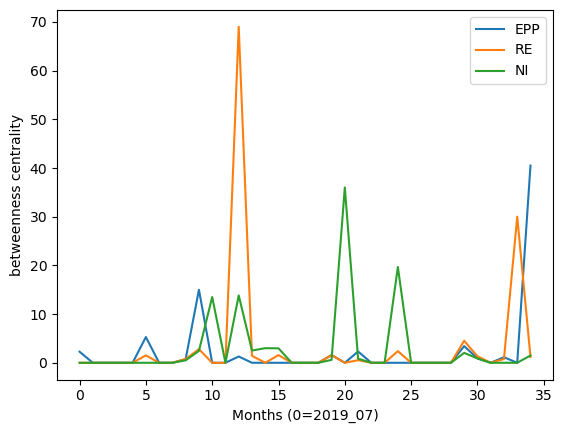

In [137]:
monthly_closeness_centality_by_party_ITRE[["EPP", "RE", "NI"]].plot()
plt.xlabel("Months (0=2019_07)")
plt.ylabel("betweenness centrality")
plt.show()
# all [["EPP", "ECR", "ID", "Greens/EFA", "RE", "S&D", "NI", "GUE/NGL"]]
#[["EPP", "RE", "NI"]]

Centralities for ITRE by country

In [139]:
monthly_closeness_centality_by_country_ITRE = []
monthly_betweenness_centality_by_country_ITRE = []
for month in months_ITRE:
    curr_cls = {}
    curr_btw = {}
    if month != 0:
        monthly_meps = set(pd.unique(ENTIRE_DATASET["MEPName"])) & set(pd.unique(month.nodes))
        for country in listCountries():
            countrymeps = set(listMEPs_by_country(country)) & monthly_meps
            if countrymeps == set():
                curr_cls[country] = 0
                curr_btw[country] = 0
            else:
                curr_cls[country] = group_closeness_centrality(month, countrymeps, weight=None)
                curr_btw[country] = group_betweenness_centrality(month, countrymeps, weight=None)
    else:
        for country in listCountries():
                curr_cls[country] = 0
                curr_btw[country] = 0
    monthly_closeness_centality_by_country_ITRE.append(curr_cls)
    monthly_betweenness_centality_by_country_ITRE.append(curr_btw)

monthly_closeness_centality_by_country_ITRE = pd.DataFrame(monthly_closeness_centality_by_country_ITRE)
monthly_betweenness_centality_by_country_ITRE = pd.DataFrame(monthly_betweenness_centality_by_country_ITRE)

In [141]:
print(monthly_betweenness_centality_by_country_ITRE)

    Czechia  Poland  France  Netherlands  Slovakia  Romania  Spain  Croatia  \
0         0       0       0            0         0        0      0        0   
1         0       0       0            0         0        0      0        0   
2         0       0       0            0         0        0      0        0   
3         0       0       0            0         0        0      0        0   
4         0       0       0            0         0        0      0        0   
5         0       0       0            0         0        0      0        0   
6         0       0       0            0         0        0      0        0   
7         0       0       0            0         0        0      0        0   
8         0       0       0            0         0        0      0        0   
9         0       0       0            0         0        0      0        0   
10        0       0       0            0         0        0      0        0   
11        0       0       0            0         0  

Centralities for ENVI by party

In [142]:
monthly_closeness_centality_by_party_ENVI = []
#monthly_weighted_closeness_centality_by_party = []
monthly_betweenness_centality_by_party_ENVI = []
#monthly_weighted_betweenness_centality_by_party = []
for month in months_ENVI:
    curr_cls = {}
    #curr_w_cls = {}
    curr_btw = {}
    #curr_w_btw = {}
    if month != 0:
        monthly_meps = set(pd.unique(ENTIRE_DATASET["MEPName"])) & set(pd.unique(month.nodes))
        for party in listPoliticalGroups():
            partymeps = set(listMEPs_by_polgroup(party)) & monthly_meps
            if partymeps == set():
                curr_cls[party] = 0
                curr_btw[party] = 0
            else:
                curr_cls[party] = group_closeness_centrality(month, partymeps, weight=None)
                #curr_w_cls[party] = group_closeness_centrality(month, partymeps, weight=month.edges.data("weight", default=0) )
                try: 
                    curr_btw[party] = group_betweenness_centrality(month, partymeps, weight=None)
                except ZeroDivisionError: 
                    curr_btw[party] = 0
                #curr_w_btw[party] = group_betweenness_centrality(month, partymeps, weight=month.edges.data("weight", default=0))
    else:
        for party in listPoliticalGroups():
                curr_cls[party] = 0
                curr_btw[party] = 0
    monthly_closeness_centality_by_party_ENVI.append(curr_cls)
    #monthly_weighted_closeness_centality_by_party.append(curr_w_cls)
    monthly_betweenness_centality_by_party_ENVI.append(curr_btw)
    #monthly_weighted_betweenness_centality_by_party.append(curr_w_btw)

monthly_closeness_centality_by_party_ENVI = pd.DataFrame(monthly_closeness_centality_by_party_ENVI)
#monthly_weighted_closeness_centality_by_party = pd.DataFrame(monthly_weighted_closeness_centality_by_party)
monthly_betweenness_centality_by_party_ENVI = pd.DataFrame(monthly_betweenness_centality_by_party_ENVI)
#monthly_weighted_betweenness_centality_by_party = pd.DataFrame(monthly_weighted_betweenness_centality_by_party)
#print(monthly_closeness_centality_by_party)

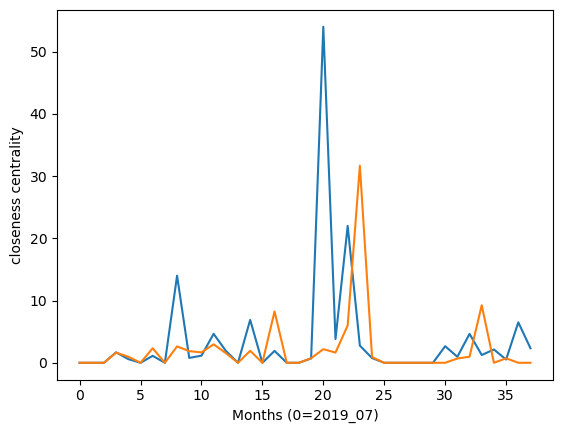

In [194]:
plt.plot(monthly_closeness_centality_by_party_ENVI[["EPP", "RE"]])
plt.xlabel("Months (0=2019_07)")
plt.ylabel("closeness centrality")
plt.xticks([i for i in range(len(TIMES))], labels = TIMES, rotation ='vertical') 
plt.show()
# all [["EPP", "ECR", "ID", "Greens/EFA", "RE", "S&D", "NI", "GUE/NGL"]]
#[["EPP", "RE", "NI"]]


In [185]:
TIMES = []
for elem in time_for_split_data:
    TIMES.append(str(elem.strftime("%Y.%m")))

In [186]:
print(TIMES)

['2019.09', '2019.10', '2019.11', '2019.12', '2020.01', '2020.02', '2020.03', '2020.04', '2020.05', '2020.06', '2020.07', '2020.08', '2020.09', '2020.10', '2020.11', '2020.12', '2021.01', '2021.02', '2021.03', '2021.04', '2021.05', '2021.06', '2021.07', '2021.08', '2021.09', '2021.10', '2021.11', '2021.12', '2022.01', '2022.02', '2022.03', '2022.04', '2022.05', '2022.06', '2022.07']
